In [1]:
import os
import shutil
import sys

import network

import numpy as np
from matplotlib import pyplot as plt
import sklearn.metrics as metrics


/home/cjw/anaconda3/envs/deep/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
datafile = 'Data/MNIST/mnist.mm'
labelsfile = 'Data/MNIST/labels.mm'

In [3]:
#cc = [0,1,7]
cc = [0,1,2,3,4,5,6,7,8,9]
c = network.get_classifier(datafile, labelsfile, 28, 1, cc, offset=128, ow=28,
                           channels=-1, dtype=np.float32, label_offset=0)

reducing classes


In [4]:
!rm -rf logs

In [5]:
# print(c.images.shape, c.labels.shape)
# plt.imshow(c.images[100,:,:,0])
# print(c.labels[100])
# c.label_nums

In [6]:
c.train(n_iter=20000, learning_rate=0.0008)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
***********************
0 2.3099015 2.198505
1000 0.0014540444 0.07709567
2000 0.04296183 0.044859476
3000 0.007594242 0.11281702
4000 0.014065797 0.09950398
5000 0.0033875997 0.011499321
6000 0.0106947385 0.024874864
7000 0.0006

In [7]:
tb, tl = c.get_balanced_batch(c.val_images,
                              c.val_labels,
                              c.class_where_val,
                              800)

vl, vsm, vlb, vcm = c.sess.run([c.loss, c.softmax, c.label_batch, c.confmat],
                      feed_dict={c.image_batch:tb,
                                 c.label_batch:tl,
                                 c.is_training:False})


In [8]:
tl.shape, np.argmax(vsm, axis=-1).shape
tls = np.argmax(tl, axis=-1)
vsms = np.argmax(vsm, axis=-1)

In [9]:
print(metrics.classification_report(tls, vsms))
print(metrics.accuracy_score(tls, vsms))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        80
          1       1.00      1.00      1.00        80
          2       0.99      0.97      0.98        80
          3       0.94      1.00      0.97        80
          4       0.98      1.00      0.99        80
          5       0.99      0.99      0.99        80
          6       1.00      0.99      0.99        80
          7       1.00      0.97      0.99        80
          8       0.99      0.97      0.98        80
          9       0.99      0.96      0.97        80

avg / total       0.99      0.99      0.99       800

0.98625


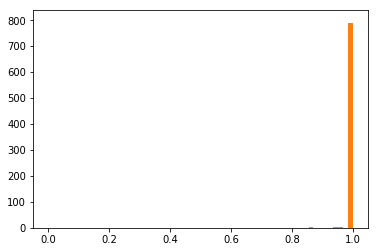

In [22]:
_ = plt.hist(np.min(vsm, axis=1), bins=25)
_ = plt.hist(np.max(vsm, axis=1), bins=25)
plt.show()

In [27]:
cm = metrics.confusion_matrix(tls, vsms)
cm = cm/cm.sum(axis=1)
import pandas as pd
cmdf = pd.DataFrame(cm)

In [28]:
cmdf

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0000,0.0000,0.000,0.0000,0.0000,0.000,0.0000,0.0000
1,0.0,1.0,0.0000,0.0000,0.000,0.0000,0.0000,0.000,0.0000,0.0000
2,0.0,0.0,0.9750,0.0250,0.000,0.0000,0.0000,0.000,0.0000,0.0000
3,0.0,0.0,0.0000,1.0000,0.000,0.0000,0.0000,0.000,0.0000,0.0000
4,0.0,0.0,0.0000,0.0000,1.000,0.0000,0.0000,0.000,0.0000,0.0000
5,0.0,0.0,0.0000,0.0125,0.000,0.9875,0.0000,0.000,0.0000,0.0000
6,0.0,0.0,0.0000,0.0000,0.000,0.0125,0.9875,0.000,0.0000,0.0000
7,0.0,0.0,0.0000,0.0250,0.000,0.0000,0.0000,0.975,0.0000,0.0000
8,0.0,0.0,0.0125,0.0000,0.000,0.0000,0.0000,0.000,0.9750,0.0125
9,0.0,0.0,0.0000,0.0000,0.025,0.0000,0.0000,0.000,0.0125,0.9625


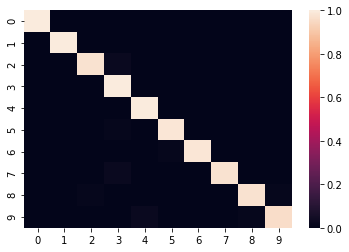

In [14]:
import seaborn as sns
sns.heatmap(cm)

In [15]:
plt.show()

In [26]:
print(cm)

[[1.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     1.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.975  0.025  0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     1.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.0125 0.     0.9875 0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.0125 0.9875 0.     0.     0.    ]
 [0.     0.     0.     0.025  0.     0.     0.     0.975  0.     0.    ]
 [0.     0.     0.0125 0.     0.     0.     0.     0.     0.975  0.0125]
 [0.     0.     0.     0.     0.025  0.     0.     0.     0.0125 0.9625]]
